In [17]:
from scapy.all import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
packets_mc = rdpcap("mc.cap")
packets_desp = rdpcap("desp.cap")

In [35]:
def createDataFrame(pkt_lst):
    protos = []
    bcast = []
    no_type_count = 0

    for pkt in pkt_lst:
        try:  
            ptype = {
                0x0800: 'IPv4',
                0x0806: 'ARP',
                0x8137: 'IPX',
                0x86dd: 'IPv6'
            }.get(pkt.type, 'Other')
            protos.append(ptype)
            isBcast = pkt.dst == 'ff:ff:ff:ff:ff:ff'
            bcast.append(isBcast)
        except AttributeError:
            no_type_count += 1
            pass
    
    data_dict = {'protocolos': protos, 'Broadcast': bcast}
    
    print("Found {} packets with no type".format(no_type_count))

    return pd.DataFrame.from_dict(data_dict)

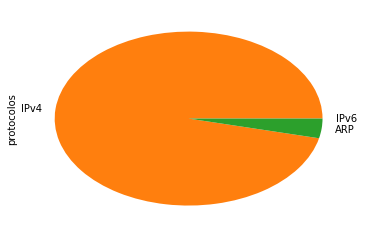

In [24]:
data_mc = createDataFrame(packets_mc)
data_mc.protocolos.value_counts(sort=False).plot.pie()

Found 423 packets with no type


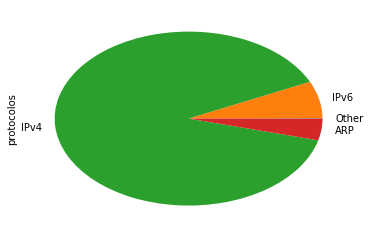

In [36]:
data_desp = createDataFrame(packets_desp)
data_desp.protocolos.value_counts(sort=False).plot.pie()

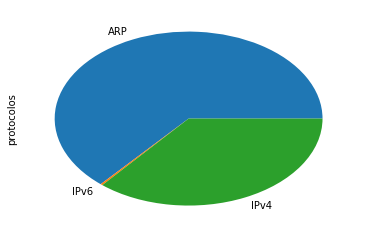

In [26]:
packets_naxio = rdpcap("pruebamac.cap")
data_naxio = createDataFrame(packets_naxio)
data_naxio.protocolos.value_counts(sort=False).plot.pie()

9825